<h1>Pandas</h1>

In [2]:
#installing pandas libraries
#!pip install pandas-datareader
#!pip install --upgrade html5lib==1.0b8

c:\users\rjsch\anaconda3\python.exe -m pip install --upgrade pip

#There is a bug in the latest version of html5lib so install an earlier version
#Restart kernel after installing html5lib

SyntaxError: unexpected character after line continuation character (<ipython-input-2-1158d8198a49>, line 5)

<h2>Imports</h2>

In [3]:
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

<h2>The structure of a dataframe</h2>

In [4]:
pd.DataFrame([[1,2,3],[1,2,3]],columns=['A','B','C'])

,A,B,C
0,1,2,3
1,1,2,3


<h3>Accessing columns and rows</h3>

In [5]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(id(df))
df.set_index('row_label',inplace=True) # inplace creates the row_label on the existing df, rather than generating a new df
print(id(df))
df

2421405675976
2421405675976


,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12
r3,20,21,22


<h3>Getting column data</h3>

In [6]:
df['B'] # explicit value lookup

row_label
r1    01
r2    11
r3    21
Name: B, dtype: object

<h3>Getting row data</h3>

In [7]:
df.loc['r1'] # loc for label name lookup

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting a row by row number</h3>

In [8]:
df.iloc[0] # iloc or integer loc to lookup by position (similar to slicing)

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting multiple columns<h3>

In [9]:
df[['B','A']] #Note that the column identifiers are in a list LIST REQ'D FOR MULTI COLUMN LOOKUP

,B,A
row_label,,
r1,01,00
r2,11,10
r3,21,20


<h3>Getting a specific cell</h3>

In [10]:
df.loc['r2','B']

'11'

In [11]:
df.loc['r2']['A']

'10'

<h3>Slicing</h3>

In [12]:
df.loc['r1':'r2']

,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12


In [13]:
df.loc['r1':'r2','B':'C']

,B,C
row_label,,
r1,01,02
r2,11,12


<h2>Pandas datareader</h2>
<li>Access data from html tables on any web page</li>
<li>Get data from google finance</li>
<li>Get data from the federal reserve</li>

<h3>HTML Tables</h3>
<li>Pandas datareader can read a table in an html page into a dataframe
<li>the read_html function returns a list of all dataframes with one dataframe for each html table on the page

<h4>Example: Read the tables on the google finance page</h4>

In [14]:
df_list = pd.read_html('https://www.google.com/finance/quote/TSLA:NASDAQ')
print(len(df_list))

1


<h4>The page contains only one table so the read_html function returns a list of one element</h4>

In [15]:
df = df_list[0]
print(df)

                (USD)  \
0             Revenue   
1          Net income   
2         Diluted EPS   
3   Net profit margin   
4    Operating income   
5  Net change in cash   
6        Cash on hand   
7     Cost of revenue   

  Sep 2021infoFiscal Q3 2021 ended 9/30/21. Reported on 10/19/21.  \
0                                             13.76B                
1                                              1.62B                
2                                               1.44                
3                                             11.76%                
4                                              2.06B                
5                                           -131.00M                
6                                             16.06B                
7                                             10.10B                

  Year/year change  
0           56.85%  
1          388.82%  
2          433.33%  
3          211.94%  
4          168.28%  
5         -102.22%  
6    

<h4>Note that the read_html function has automatically detected the header columns</h4>
<h4>If an index is necessary, we need to explicitly specify it</h4>

In [16]:
df.set_index('Currency',inplace=True)
print(df)

KeyError: "None of ['Currency'] are in the columns"

<h4>Now we can use .loc to extract specific currency rates</h4>

In [17]:
df.loc['EUR-CHF','Value']

KeyError: 'EUR-CHF'

<h3>Working with views and copies</h3>

<h4>Chained indexing creates a copy and changes to the copy won't be reflected in the original dataframe</h4>

In [18]:
eur_usd = df.loc['EUR-USD']['Change'] #This is chained indexing
df.loc['EUR-USD']['Change'] = 1.0 #Here we are changing a value in a copy of the dataframe
print(eur_usd)
print(df.loc['EUR-USD']['Change']) #Neither eur_usd, nor the dataframe are changed

KeyError: 'EUR-USD'

In [18]:
eur_usd = df.loc['EUR-USD','Change'] #eur_usd points to the value inside the dataframe
df.loc['EUR-USD','Change'] = 1.0 #Change the value in the view 
print(eur_usd) #eur_usd is changed (because it points to the view)
print(df.loc['EUR-USD']['Change']) #The dataframe has been correctly updated

KeyError: 'EUR-USD'

<h2>Getting historical stock prices from Google financs</h2>
Usage: DataReader(ticker,source,startdate,enddate)<br>
Unfortunately, the Yahoo finance datareader has stopped working because of a change to Yahoo's website


In [19]:
from pandas_datareader import data
import datetime as dt
start=dt.datetime(2017, 1, 1)
end=dt.datetime.today()


print(start,end)


df = data.DataReader('SNOW', 'yahoo', start, end)


2017-01-01 00:00:00 2021-11-24 23:08:36.535290


RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/SNOW/history?period1=1483272000&period2=1637841599&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [20]:
df

,(USD),Sep 2021infoFiscal Q3 2021 ended 9/30/21. Reported on 10/19/21.,Year/year change
0,Revenue,13.76B,56.85%
1,Net income,1.62B,388.82%
2,Diluted EPS,1.44,433.33%
3,Net profit margin,11.76%,211.94%
4,Operating income,2.06B,168.28%
5,Net change in cash,-131.00M,-102.22%
6,Cash on hand,16.06B,10.56%
7,Cost of revenue,10.10B,50.52%


<h2>Datareader documentation</h2>
http://pandas-datareader.readthedocs.io/en/latest/</h2>

<h3>Working with a timeseries data frame</h3>
<li>The data is organized by time with the index serving as the timeline


<h4>Creating new columns</h4>
<li>Add a column to a dataframe
<li>Base the elements of the column on some combination of data in the existing columns
<h4>Example: Number of Days that the stock closed higher than it opened
<li>We'll create a new column with the header "UP"
<li>And use np.where to decide what to put in the column

In [21]:
df['UP']=np.where(df['Close']>df['Open'],1,0)
df

KeyError: 'Close'

<h3>Get summary statistics</h3>
<li>The "describe" function returns a dataframe containing summary stats for all numerical columns
<li>Columns containing non-numerical data are ignored

In [67]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,93.000000,93.000000,93.000000,93.000000,9.300000e+01,93.000000
mean,290.510194,270.696887,280.096022,279.489463,4.515564e+06,279.489463
std,44.153006,38.932745,40.454950,41.101536,4.862413e+06,41.101536
min,230.949997,208.550003,213.509995,217.389999,9.868000e+05,217.389999
25%,252.360001,241.500000,247.000000,246.000000,1.741200e+06,246.000000
50%,283.000000,263.000000,271.480011,268.019989,3.205200e+06,268.019989
75%,313.480011,294.149994,304.000000,302.809998,5.202600e+06,302.809998
max,429.000000,386.250000,393.500000,390.000000,3.609970e+07,390.000000


<h4>Calculate the percentage of days that the stock has closed higher than its open</h4>

In [22]:
df['UP'].sum()/df['UP'].count()

KeyError: 'UP'

<h4>Calculate percent changes</h4>
<li>The function pct_change computes a percent change between successive rows (times in  timeseries data)
<li>Defaults to a single time delta
<li>With an argument, the time delta can be changed

In [69]:
df['Close'].pct_change() #One timeperiod percent change

Date
2020-09-16         NaN
2020-09-17   -0.103926
2020-09-18    0.054760
2020-09-21   -0.046458
2020-09-22    0.027573
                ...   
2021-01-22   -0.002235
2021-01-25    0.005496
2021-01-26   -0.021828
2021-01-27   -0.052602
2021-01-28    0.034335
Name: Close, Length: 93, dtype: float64

In [29]:
n=13
df['Close'].pct_change(n) #n timeperiods percent change

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
                ...   
2021-01-22   -0.043005
2021-01-25   -0.059933
2021-01-26   -0.052595
2021-01-27   -0.050547
2021-01-28   -0.061853
Name: Close, Length: 1025, dtype: float64

<h3>NaN support</h3>
Pandas functions can ignore NaNs

In [70]:
n=13
df['Close'].pct_change(n).mean()

0.04548856936302654

<h3>Rolling windows</h3>
<li>"rolling" function extracts rolling windows
<li>For example, the 21 period rolling window of the 13 period percent change 

In [71]:
df['Close'].pct_change(n).rolling(21)

Rolling [window=21,center=False,axis=0]

<h4>Calculate something on the rolling windows</h4>

<h4>Example: mean (the 21 day moving average of the 13 day percent change)

In [72]:
n=13
df['Close'].pct_change(n).rolling(21).mean()

Date
2020-09-16         NaN
2020-09-17         NaN
2020-09-18         NaN
2020-09-21         NaN
2020-09-22         NaN
                ...   
2021-01-22   -0.111596
2021-01-25   -0.111200
2021-01-26   -0.102013
2021-01-27   -0.099891
2021-01-28   -0.093174
Name: Close, Length: 93, dtype: float64

<h4>Calculate several moving averages and graph them</h4>

In [73]:
ma_8 = df['Close'].pct_change(n).rolling(window=8).mean()
ma_13= df['Close'].pct_change(n).rolling(window=13).mean()
ma_21= df['Close'].pct_change(n).rolling(window=21).mean()
ma_34= df['Close'].pct_change(n).rolling(window=34).mean()
ma_55= df['Close'].pct_change(n).rolling(window=55).mean()

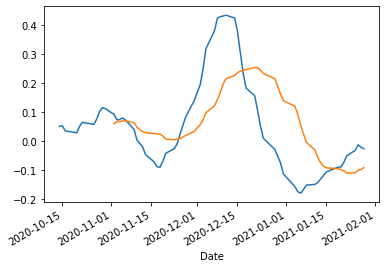

In [78]:
ma_8.plot()
ma_21.plot()

<h2>Linear regression with pandas</h2>
<h4>Example: TAN is the ticker for a solar ETF. FSLR, RGSE, and SCTY are tickers of companies that build or lease solar panels. Each has a different business model. We'll use pandas to study the risk reward tradeoff between the 4 investments and also see how correlated they are</h4>

In [81]:
import datetime
import pandas_datareader as data
start = datetime.datetime(2020,9,27)
end = datetime.datetime(2021,1,27)
solar_df = data.DataReader(['AIQ','ADBE','SNOW','CLDR'],'yahoo', start=start,end=end)['Close']

In [82]:
solar_df

Symbols,AIQ,ADBE,SNOW,CLDR
Date,,,,
2020-09-28,23.226000,488.510010,250.410004,10.85
2020-09-29,23.325001,489.329987,259.130005,10.95
2020-09-30,23.504000,490.429993,251.000000,10.89
2020-10-01,23.806999,499.510010,243.460007,10.89
2020-10-02,23.472000,478.989990,227.100006,10.61
...,...,...,...,...
2021-01-21,28.830000,472.019989,286.320007,14.09
2021-01-22,28.670000,472.440002,285.679993,14.02
2021-01-25,28.900000,473.440002,287.250000,13.88


<h4>Let's calculate returns (the 1 day percent change)</h4>

In [83]:
rets = solar_df.pct_change()
print(rets)

Symbols          AIQ      ADBE      SNOW      CLDR
Date                                              
2020-09-28       NaN       NaN       NaN       NaN
2020-09-29  0.004263  0.001679  0.034823  0.009217
2020-09-30  0.007674  0.002248 -0.031374 -0.005479
2020-10-01  0.012891  0.018514 -0.030040  0.000000
2020-10-02 -0.014071 -0.041080 -0.067198 -0.025712
...              ...       ...       ...       ...
2021-01-21  0.006634  0.004875  0.015751 -0.022207
2021-01-22 -0.005550  0.000890 -0.002235 -0.004968
2021-01-25  0.008022  0.002117  0.005496 -0.009986
2021-01-26 -0.007266  0.005999 -0.021828  0.038905
2021-01-27 -0.031893 -0.034182 -0.052602  0.060333

[84 rows x 4 columns]


<h4>Let's visualize the relationship between each stock and the ETF</h4>

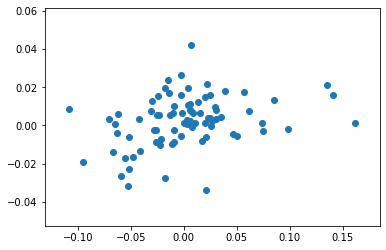

In [85]:
import matplotlib.pyplot as plt
plt.scatter(rets.SNOW,rets.AIQ)

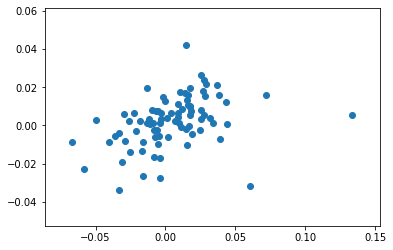

In [86]:
plt.scatter(rets.CLDR,rets.AIQ)

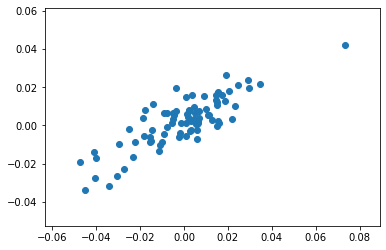

In [87]:
plt.scatter(rets.ADBE,rets.AIQ)

<h4>The correlation matrix</h4>

In [88]:
solar_corr = rets.corr()
print(solar_corr)

Symbols       AIQ      ADBE      SNOW      CLDR
Symbols                                        
AIQ      1.000000  0.837331  0.327508  0.377407
ADBE     0.837331  1.000000  0.257197  0.352790
SNOW     0.327508  0.257197  1.000000  0.273855
CLDR     0.377407  0.352790  0.273855  1.000000


<h3>Basic risk analysis</h3>
<h4>We'll plot the mean and std or returns for each ticker to get a sense of the risk return profile</h4>

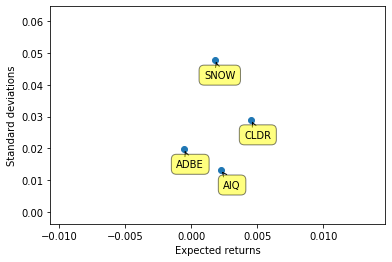

In [89]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()


<h2>Regressions</h2>
http://statsmodels.sourceforge.net/

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [64]:
import numpy as np
import statsmodels.api as sm
X=solar_df[['CLDR','SNOW','ADBE']]
X = sm.add_constant(X)
y=solar_df['SNOW']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   SNOW   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.530e+29
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:50:44   Log-Likelihood:                 2332.1
No. Observations:                  84   AIC:                            -4656.
Df Residuals:                      80   BIC:                            -4646.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.821e-13   7.26e-13     -0.939      0.3

<h4>Finally plot the fitted line with the actual y values

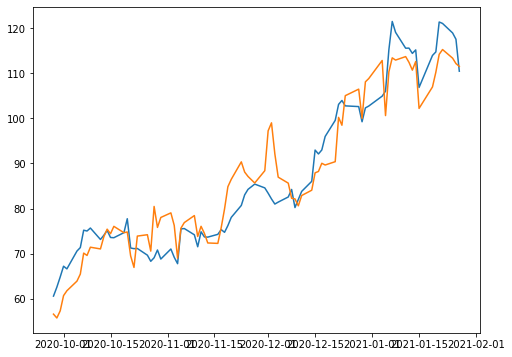

In [51]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues)